In [1]:
%matplotlib inline
import brickschema as bs
import pymortar
import pandas as pd
import time

from relaxation_graphs.full_relaxation_graph import get_relaxed_graph
from utils import generate_brick_query_from_node, extract_triples


from queries.mortar import queries as q1
from queries.cbe import queries as q2
from queries.nrel import queries as q3
print(len(q1), len(q2), len(q3))

17 10 7


In [2]:
c = pymortar.Client("https://beta-api.mortardata.org")
def get_non_zero(q):
    """Returns the # of buildings that return results on the given query"""
    print(q)
    df = c.qualify([q]).df
    return df[df > 0].dropna().count().sum()

In [6]:
query_bank = q1 + q2 + q3
max_level = 5

rows = []

for query in query_bank:
    relaxed_queries = get_relaxed_graph(query=query, max_level=max_level)
    for level in range(max_level+1):
        queries = []
        data = relaxed_queries.nodes().data()
        for node in relaxed_queries.nodes():
            if data[node]['level'] == level:
                brick_query = generate_brick_query_from_node(data[node]['query'], select_statement="SELECT * WHERE {")
                queries.append(brick_query)
#         num_bldgs = sum([get_non_zero(q) for q in queries])
#         print('level', level, 'has', len(queries), 'queries')
        rows.append({'level': level, 'num_queries': len(queries), 'size': len(extract_triples(query))})

rowdf = pd.DataFrame.from_records(rows)

In [7]:
rowdf.head()

,level,num_queries,size
0,0,1,2
1,1,1,2
2,2,0,2
3,3,0,2
4,4,0,2


In [11]:
rowdf.to_csv("queries_generated_per_level.csv", index=False)

<AxesSubplot:xlabel='level', ylabel='num_queries'>

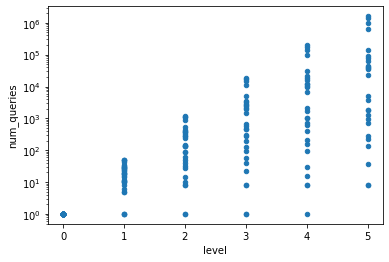

In [8]:
rowdf.plot.scatter(x='level', y='num_queries', logy=True)

<AxesSubplot:title={'center':'num_queries'}, xlabel='level'>

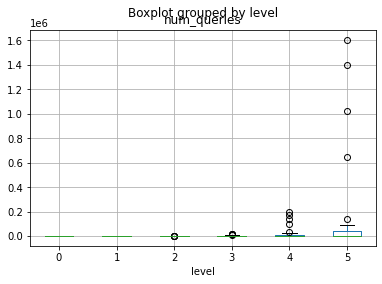

In [9]:
rowdf.boxplot(column='num_queries', by='level')

<AxesSubplot:title={'center':'num_queries'}, xlabel='size'>

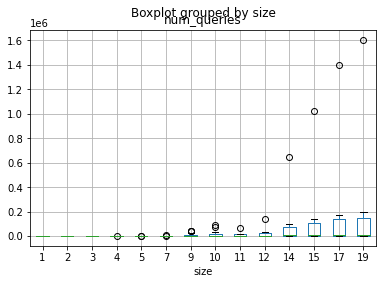

In [10]:
rowdf.boxplot(column='num_queries', by='size')